In [1]:
import pandas as pd
from tqdm import tqdm
from hopfield import *

In [7]:
# n nodes
# k images
# see if the images are fixed pts (not necessarily stable)
max_num_nodes_to_test = 100
remembrance_threshold = 0.05
number_of_trials_per_num_nodes = 20

In [3]:
def check_remembrance(network: Hopfield, image: np.array):
    network.values = image
    updated_values = network.do_synchronous_update()
    hamming_distance = network.hamming_distance(updated_values, image)
    try:
        assert hamming_distance <= int(0.00 * network.n)
        return True
    except AssertionError:
        # print(hamming_distance)
        return False

In [4]:
def check_multiple_remembrances(network: Hopfield, images: list[np.array]):
    for image in images:
        if not check_remembrance(network, image):
            return False
    return True

In [14]:
def find_how_many_images_network_can_store_with_n_nodes(n: int):
    remembrance_data = []
    network = Hopfield(shape = (n, 1))
    network.train_on_values()
    images_trained_on = [np.array(network.values)]
    remembrance_data.append(check_multiple_remembrances(network, images_trained_on))

    while remembrance_data[-1] is True:
        random_image = network.generate_random_image()
        network.train_on_new(random_image)
        #network.storkey_train(random_image)
        images_trained_on.append(random_image)
        remembrance_data.append(check_multiple_remembrances(network, images_trained_on))

    return len(remembrance_data) - 1

In [6]:
print(find_how_many_images_network_can_store_with_n_nodes(100))

38


In [8]:
num_images_remembered = {n: [] for n in range(10, max_num_nodes_to_test + 1)}

for n in tqdm(range(10, max_num_nodes_to_test + 1)):
    for _ in range(number_of_trials_per_num_nodes):
        num_images_remembered[n].append(find_how_many_images_network_can_store_with_n_nodes(n))num_images_remembered = {n: [] for n in range(10, max_num_nodes_to_test + 1)}


100%|██████████| 91/91 [57:50<00:00, 38.14s/it] 


In [15]:
n_images_remembered = {n: [] for n in range(10, max_num_nodes_to_test + 1)}

for n in tqdm(range(10, max_num_nodes_to_test + 1)):
    for _ in range(number_of_trials_per_num_nodes):
        n_images_remembered[n].append(find_how_many_images_network_can_store_with_n_nodes(n))

100%|██████████| 91/91 [00:20<00:00,  4.36it/s] 


In [10]:
interpreted_data = {"num remembered": [sum(num_images_remembered[n]) / len(num_images_remembered[n]) for n in num_images_remembered.keys()], "num nodes": [n for n in num_images_remembered.keys()]}


In [16]:
i_data = {"num remembered": [sum(n_images_remembered[n]) / len(n_images_remembered[n]) for n in n_images_remembered.keys()], "num nodes": [n for n in n_images_remembered.keys()]}


In [11]:
dataframe = pd.DataFrame(interpreted_data)


In [17]:
df = pd.DataFrame(i_data)

In [18]:
df

,num remembered,num nodes
0,3.15,10
1,3.10,11
2,3.45,12
3,3.10,13
4,3.80,14
...,...,...
86,10.45,96
87,9.45,97
88,10.45,98
89,10.25,99


In [12]:
dataframe

,num remembered,num nodes
0,7.50,10
1,9.15,11
2,9.15,12
3,8.90,13
4,9.85,14
...,...,...
86,42.45,96
87,43.00,97
88,42.50,98
89,41.55,99


[0.39725593 4.38279185]


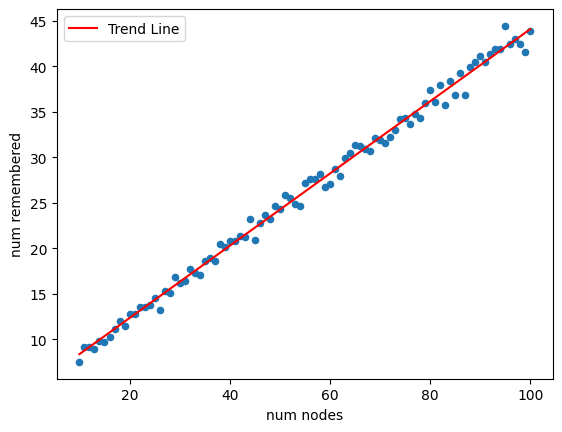

In [9]:
interpreted_data = {"num remembered": [sum(num_images_remembered[n]) / len(num_images_remembered[n]) for n in num_images_remembered.keys()], "num nodes": [n for n in num_images_remembered.keys()]}
dataframe = pd.DataFrame(interpreted_data)

fit = np.polyfit(pd.to_numeric(interpreted_data["num nodes"]), pd.to_numeric(interpreted_data["num remembered"]), 1)
line = np.poly1d(fit)
dataframe.insert(1, "Trend Line", line(pd.to_numeric(interpreted_data["num nodes"])))
# print(interpreted_data)
# print(dataframe)
ax = dataframe.plot(x="num nodes", y="num remembered", kind="scatter")
dataframe.plot(x="num nodes", y="Trend Line", ax=ax, color="Red")
print(fit)

In [28]:
import matplotlib.pyplot as plt

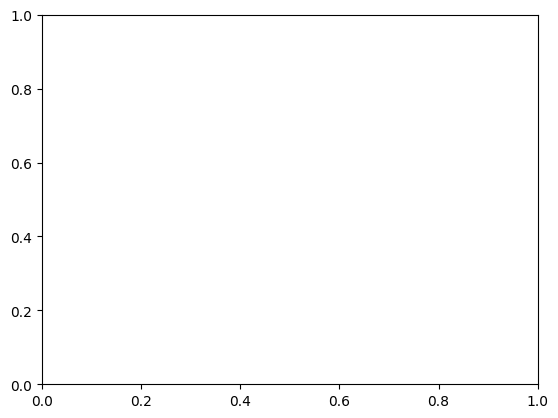

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(1)

In [31]:
ax1.scatter(x = dataframe['num nodes'], y = dataframe['num remembered'])


In [26]:
plt.show()

In [27]:
plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

<Axes: xlabel='num nodes', ylabel='num remembered'>

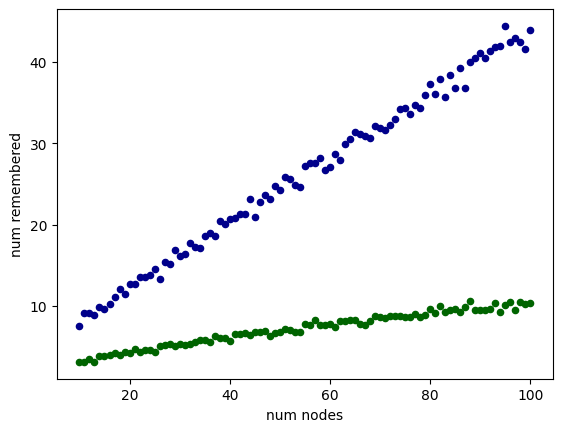

In [34]:
ax = dataframe.plot.scatter(x = 'num nodes', y = 'num remembered', c= 'DarkBlue')
df.plot.scatter(ax = ax, x = 'num nodes', y = 'num remembered', c = 'DarkGreen')

In [36]:
!pip3 install seaborn

     |████████████████████████████████| 293 kB 3.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [37]:
import seaborn as sns

In [38]:
import matplotlib.pyplot as plt


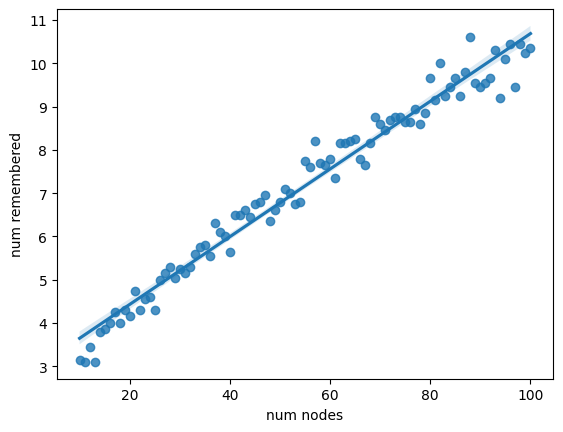

In [40]:
sns.regplot(x = "num nodes",
            y = "num remembered",
            data = df)
 
# show there plot
plt.show()

In [43]:
df['type'] = 'Hebbian'
dataframe['type'] = 'Storkey'

In [44]:
dfc = pd.concat([dataframe, df], ignore_index = True)

In [45]:
dfc

,num remembered,num nodes,type
0,7.50,10,Storkey
1,9.15,11,Storkey
2,9.15,12,Storkey
3,8.90,13,Storkey
4,9.85,14,Storkey
...,...,...,...
177,10.45,96,Hebbian
178,9.45,97,Hebbian
179,10.45,98,Hebbian
180,10.25,99,Hebbian


In [47]:
g = sns.relplot(data=df, x='num nodes', y='num remembered', kind='reg', hue='type', palette=['red', 'blue'])


ValueError: Plot kind reg not recognized

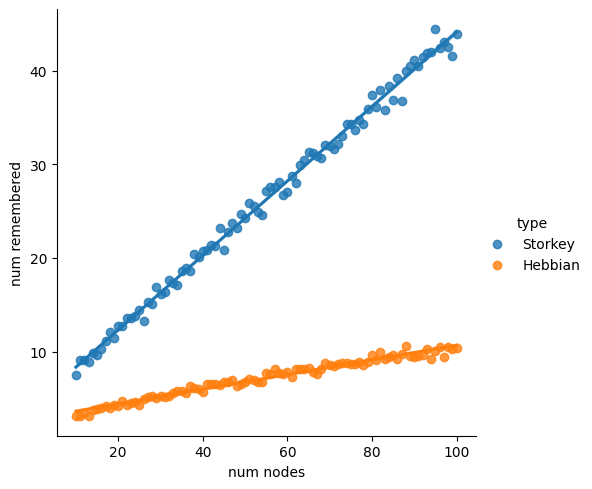

In [50]:
sns.lmplot(x = "num nodes",
            y = "num remembered",
            data = dfc, hue = 'type')
 
# show there plot
plt.show()

In [63]:
x_setup = np.linspace(10, 100, 100)
hebbian = x_setup / (2 * np.log(x_setup))

storkey = x_setup / (np.sqrt(2 * np.log(x_setup)))

In [67]:
plt.figure(figsize(16,10))

NameError: name 'figsize' is not defined

In [71]:
import matplotlib.patches as mpatches

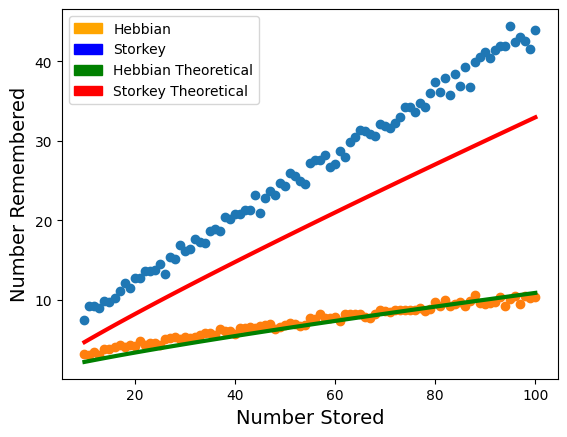

In [74]:
plt.scatter(x = dataframe['num nodes'], y = dataframe['num remembered'])
plt.scatter(x = df['num nodes'], y = df['num remembered'])
plt.plot(x_setup,hebbian, color = "green", linewidth = 3)
plt.plot(x_setup, storkey, color = 'red', linewidth = 3)
plt.ylabel('Number Remembered', fontsize=14)
plt.xlabel('Number Stored', fontsize=14)

bp = mpatches.Patch(color='blue', label='Storkey')
op = mpatches.Patch(color='orange', label='Hebbian')
gp = mpatches.Patch(color='green', label='Hebbian Theoretical')
rp = mpatches.Patch(color='red', label='Storkey Theoretical')
plt.legend(handles=[op,bp,gp,rp])

plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


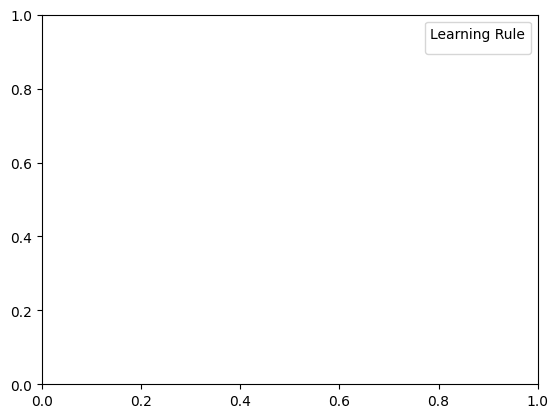

In [53]:
plt.legend(title='Learning Rule')
